#Load dataset

In [1]:
import pandas as pd

df = pd.read_csv('train_house_price.csv')

In [2]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


##check data info

In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

##Check missing columns

###Drop columns that contain missing value more than 75%

In [6]:
missing_col = []
col_to_drop = []
for feature in df.columns:
  if df[feature].isnull().sum() > 0:
    missing_col.append(feature)
    print(f'{feature}: {df[feature].isnull().mean()*100} % missing values')
    if df[feature].isnull().mean() > 0.75:
      col_to_drop.append(feature)

LotFrontage: 17.73972602739726 % missing values
Alley: 93.76712328767123 % missing values
MasVnrType: 59.726027397260275 % missing values
MasVnrArea: 0.547945205479452 % missing values
BsmtQual: 2.5342465753424657 % missing values
BsmtCond: 2.5342465753424657 % missing values
BsmtExposure: 2.6027397260273974 % missing values
BsmtFinType1: 2.5342465753424657 % missing values
BsmtFinType2: 2.6027397260273974 % missing values
Electrical: 0.0684931506849315 % missing values
FireplaceQu: 47.26027397260274 % missing values
GarageType: 5.5479452054794525 % missing values
GarageYrBlt: 5.5479452054794525 % missing values
GarageFinish: 5.5479452054794525 % missing values
GarageQual: 5.5479452054794525 % missing values
GarageCond: 5.5479452054794525 % missing values
PoolQC: 99.52054794520548 % missing values
Fence: 80.75342465753424 % missing values
MiscFeature: 96.30136986301369 % missing values


In [7]:
df.drop(labels=col_to_drop, axis=1, inplace=True)

In [8]:
missing_col = list(set(missing_col) - set(col_to_drop))

###Handle missing value for Garage

In [9]:
garage_missing_cols = [col for col in missing_col if col.startswith('Garage')]

missing_df = df[garage_missing_cols].isnull()

same_missing_rows = missing_df.all(axis=1)

if same_missing_rows.sum() == missing_df.any(axis=1).sum():
    print("All specified columns have missing values in the same rows.")
else:
    print("The specified columns do not have missing values in the same rows.")

All specified columns have missing values in the same rows.


In [10]:
df.loc[df['GarageType'].isnull(), ['GarageCars', 'GarageArea']].value_counts()

,,count
GarageCars,GarageArea,
0,0,81


In [11]:
for garage in garage_missing_cols:
  if df[garage].dtype == 'object':
    df[garage].fillna('NA', inplace=True)
  else:
    df[garage].fillna(0, inplace=True)

<ipython-input-11-0e0a649aacd8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[garage].fillna('NA', inplace=True)
<ipython-input-11-0e0a649aacd8>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.metho

In [12]:
missing_col = list(set(missing_col) - set(garage_missing_cols))

###Fill basement

In [13]:
bsmt_missing_cols = [col for col in missing_col if col.startswith('Bsmt')]

missing_df = df[bsmt_missing_cols].isnull()

same_missing_rows = missing_df.all(axis=1)

print('There are', same_missing_rows.sum(), 'entries missing in the same row.')

There are 37 entries missing in the same row.


In [14]:
df.loc[df['BsmtQual'].isnull(), ['TotalBsmtSF']].value_counts()

,count
TotalBsmtSF,
0,37


In [15]:
fill_values = {
    'BsmtQual': 'NA',
    'BsmtCond': 'NA',
    'BsmtExposure': 'NA',
    'BsmtFinType1': 'NA',
    'BsmtFinType2': 'NA',
}

for col, value in fill_values.items():
    df.loc[same_missing_rows, col] = value

In [16]:
df.loc[df['BsmtFinType2'].isnull(), df.columns[df.columns.str.startswith('Bsmt') | (df.columns == 'TotalBsmtSF')]]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
332,Gd,TA,No,GLQ,1124,NaN,479,1603,3206,1,0


In [17]:
df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0], inplace=True)

<ipython-input-17-739d4c93cef2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0], inplace=True)


In [18]:
df.loc[df['BsmtExposure'].isnull(), df.columns[df.columns.str.startswith('Bsmt') | (df.columns == 'TotalBsmtSF')]]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
948,Gd,TA,NaN,Unf,0,Unf,0,936,936,0,0


In [19]:
df['BsmtExposure'].fillna('No', inplace=True)

<ipython-input-19-ba6430469936>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BsmtExposure'].fillna('No', inplace=True)


In [20]:
missing_col = list(set(missing_col) - set(bsmt_missing_cols))

###Fill Mas

In [21]:
df.loc[df['MasVnrType'].isnull(), ['MasVnrArea']].value_counts()

,count
MasVnrArea,
0.0,859
1.0,2
288.0,1
312.0,1
344.0,1


In [22]:
df.loc[(df['MasVnrType'].isnull()) & (df['MasVnrArea'] == 0), 'MasVnrType'] = 'None'

In [23]:
df.loc[df['MasVnrType'].isnull(), ['MasVnrArea']].value_counts()

,count
MasVnrArea,
1.0,2
288.0,1
312.0,1
344.0,1


In [24]:
df.groupby('MasVnrType')['MasVnrArea'].describe()

,count,mean,std,min,25%,50%,75%,max
MasVnrType,,,,,,,,
BrkCmn,15.0,247.666667,182.423239,41.0,91.5,192.0,381.50,621.0
BrkFace,445.0,259.008989,215.137888,0.0,114.0,202.0,336.00,1600.0
None,859.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
Stone,128.0,239.304688,172.129257,0.0,111.5,206.5,296.25,860.0


In [25]:
mode_masvnrtype = df.loc[df['MasVnrArea'] > 0, 'MasVnrType'].mode()[0]
mode_masvnrtype

'BrkFace'

In [26]:
df['MasVnrType'].fillna(mode_masvnrtype, inplace=True)

<ipython-input-26-ee3021afa44e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MasVnrType'].fillna(mode_masvnrtype, inplace=True)


In [27]:
df.loc[df['MasVnrArea'].isnull(), ['MasVnrType']].value_counts()

,count
MasVnrType,
BrkFace,8


In [28]:
median_masvnrarea = df.loc[df['MasVnrType'] == 'BrkFace', 'MasVnrArea'].median()
median_masvnrarea

202.5

In [29]:
df['MasVnrArea'].fillna(median_masvnrarea, inplace=True)

<ipython-input-29-566a7f0a4e45>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MasVnrArea'].fillna(median_masvnrarea, inplace=True)


###Fill fireplaceQu

In [30]:
df.loc[df['FireplaceQu'].isnull(), ['Fireplaces']].value_counts()

,count
Fireplaces,
0,690


In [31]:
df['FireplaceQu'].fillna('NA', inplace=True)

<ipython-input-31-904300d643e0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FireplaceQu'].fillna('NA', inplace=True)


###Fill lotfrontage

In [32]:
df.groupby('MSZoning')['LotFrontage'].describe()

,count,mean,std,min,25%,50%,75%,max
MSZoning,,,,,,,,
C (all),10.0,69.700000,23.466525,50.0,60.0,60.0,66.0,120.0
FV,57.0,59.491228,23.041982,24.0,35.0,65.0,75.0,102.0
RH,13.0,58.923077,14.407530,34.0,55.0,60.0,60.0,82.0
RL,922.0,74.680043,23.238008,24.0,60.0,72.0,84.0,313.0
RM,199.0,52.366834,20.501074,21.0,40.0,51.0,60.0,153.0


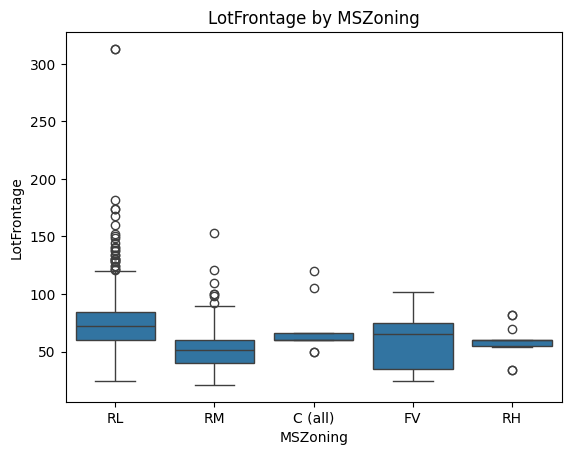

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='MSZoning', y='LotFrontage')
plt.title('LotFrontage by MSZoning')
plt.show()

In [34]:
median_lotfrontage = df.groupby('MSZoning')['LotFrontage'].median()

for zone, median_value in median_lotfrontage.items():
    df.loc[(df['LotFrontage'].isnull()) & (df['MSZoning'] == zone), 'LotFrontage'] = median_value

In [35]:
df.loc[df['Electrical'].isnull(), ['Utilities']].value_counts()

,count
Utilities,
AllPub,1


###Fill electrical

In [36]:
mode_electrical = df['Electrical'].mode()[0]
mode_electrical

'SBrkr'

In [37]:
df['Electrical'].fillna(mode_electrical, inplace=True)

<ipython-input-37-3d21cdad6df0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Electrical'].fillna(mode_electrical, inplace=True)


In [38]:
if not (df.isnull().sum().any()):
    print('No missing values')
else:
    print('There are missing values')

No missing values


###Encode categorical variable

1. identified cat variable
2. split into nominal and ordinal cat
3. perform encoding

In [39]:
categorical_var = df.select_dtypes(include=['object']).columns
categorical_var

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [40]:
ordinal_mappings = {
    'LotShape': ['Reg', 'IR1', 'IR2', 'IR3'],
    'LandSlope': ['Gtl', 'Mod', 'Sev'],
    'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtQual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtCond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtExposure': ['NA', 'No', 'Mn', 'Av', 'Gd'],
    'BsmtFinType1': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'BsmtFinType2': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'FireplaceQu': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageFinish': ['NA', 'Unf', 'RFn', 'Fin'],
    'GarageQual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageCond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
}

In [41]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_cols = list(ordinal_mappings.keys())
enc = OrdinalEncoder(categories=[ordinal_mappings[col] for col in ordinal_cols])
df[ordinal_cols] = enc.fit_transform(df[ordinal_cols])

In [42]:
df[ordinal_cols].head()

,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageFinish,GarageQual,GarageCond
0,0.0,0.0,3.0,2.0,4.0,3.0,1.0,6.0,1.0,4.0,3.0,0.0,2.0,3.0,3.0
1,0.0,0.0,2.0,2.0,4.0,3.0,4.0,5.0,1.0,4.0,2.0,3.0,2.0,3.0,3.0
2,1.0,0.0,3.0,2.0,4.0,3.0,2.0,6.0,1.0,4.0,3.0,3.0,2.0,3.0,3.0
3,1.0,0.0,2.0,2.0,3.0,4.0,1.0,5.0,1.0,3.0,3.0,4.0,1.0,3.0,3.0
4,1.0,0.0,3.0,2.0,4.0,3.0,3.0,6.0,1.0,4.0,3.0,3.0,2.0,3.0,3.0


In [43]:
nominal_cols = list(set(categorical_var) - set(ordinal_cols))

for col in nominal_cols:
  print(col,':', len(df[col].unique()), 'labels')

LotConfig : 5 labels
Condition2 : 8 labels
SaleType : 9 labels
RoofMatl : 8 labels
Exterior1st : 15 labels
HouseStyle : 8 labels
RoofStyle : 6 labels
PavedDrive : 3 labels
MasVnrType : 4 labels
MSZoning : 5 labels
GarageType : 7 labels
SaleCondition : 6 labels
Electrical : 5 labels
CentralAir : 2 labels
Street : 2 labels
Utilities : 2 labels
Condition1 : 9 labels
Foundation : 6 labels
Functional : 7 labels
Heating : 6 labels
Neighborhood : 25 labels
BldgType : 5 labels
Exterior2nd : 16 labels
LandContour : 4 labels


In [44]:
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

In [45]:
df.to_csv('cleaned_data.csv', index=False)

###Feature scaling

In [46]:
scaling_cols = list(set(df.columns.to_list()) - set(['Id', 'SalePrice']))

In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df[scaling_cols])
df[scaling_cols] = scaler.fit_transform(df[scaling_cols])

In [48]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,LandContour_HLS,LandContour_Low,LandContour_Lvl
0,1,0.235294,0.150685,0.033420,0.000000,0.0,0.666667,0.500,0.949275,0.883333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2,0.000000,0.202055,0.038795,0.000000,0.0,0.555556,0.875,0.753623,0.433333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,0.235294,0.160959,0.046507,0.333333,0.0,0.666667,0.500,0.934783,0.866667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,4,0.294118,0.133562,0.038561,0.333333,0.0,0.666667,0.500,0.311594,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,5,0.235294,0.215753,0.060576,0.333333,0.0,0.777778,0.500,0.927536,0.833333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [49]:
df2 = df.copy()

###Regression model

In [50]:
from sklearn.model_selection import train_test_split

X = df.drop(['Id', 'SalePrice'], axis=1)
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=0.1),
    'Lasso Regression': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'XGB': XGBRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=6,
        random_state=42
      )
}

results = {}
for name, model in models.items():

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    results[name] = {
        'R²': r2,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    }

results_df = pd.DataFrame(results).T
print(results_df)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.400e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


                         R²           MAE           MSE          RMSE
Linear Regression  0.676410  21868.336446  2.482044e+09  49820.120292
Ridge Regression   0.846441  20467.604152  1.177845e+09  34319.753154
Lasso Regression   0.677753  21839.138200  2.471738e+09  49716.580567
ElasticNet         0.790067  23044.419154  1.610254e+09  40127.966314
XGB                0.912554  16709.009766  6.707385e+08  25898.619577


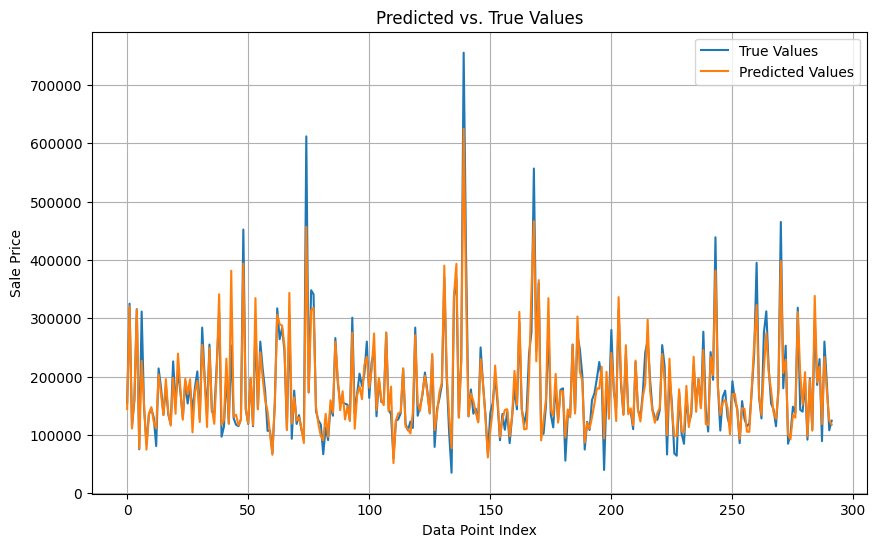

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='True Values')
plt.plot(y_pred, label='Predicted Values')
plt.xlabel("Data Point Index")
plt.ylabel("Sale Price")
plt.title("Predicted vs. True Values")
plt.legend()
plt.grid(True)
plt.show()

###Feature selection

Perform feature selection before integrating into the application

In [53]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(estimator=models['XGB']).fit(X_train, y_train)

selected_features_mask = selector.get_support()

selected_features = X_train.columns[selected_features_mask]
selected_features_data = selected_features.to_list()
selected_features_data

['OverallQual',
 'YearBuilt',
 'BsmtQual',
 'BsmtFinType1',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'FireplaceQu',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'OpenPorchSF',
 'Exterior1st_BrkFace',
 'MSZoning_RM',
 'GarageType_Attchd',
 'GarageType_Detchd',
 'CentralAir_Y',
 'Condition1_PosN',
 'Functional_Min1',
 'Functional_Typ',
 'Neighborhood_Edwards']

In [54]:
f = open('selected_features.txt', 'w')
f.write('\n'.join(selected_features_data))
f.close()

In [55]:
scaling_cols = list(set(df2[selected_features].columns.to_list()) - set(['Id', 'SalePrice']))

scaler = MinMaxScaler()
scaler.fit(df[scaling_cols])
df2[scaling_cols] = scaler.fit_transform(df2[scaling_cols])

###Import model and scaler

In [56]:
import pickle

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [57]:
filename = 'xgb_model.pkl'
pickle.dump(models['XGB'], open(filename, 'wb'))